fl417_NNHonly

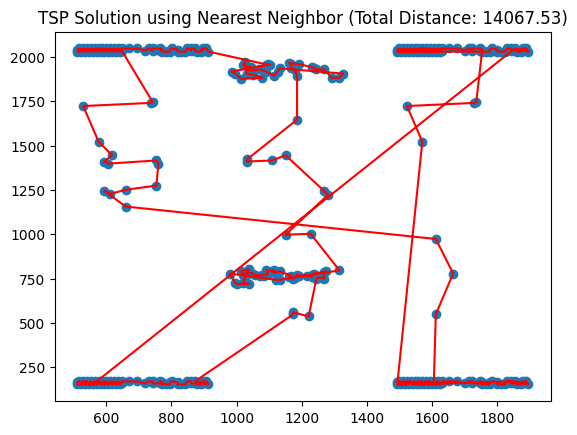

Time taken to render: 0.6958599090576172 seconds




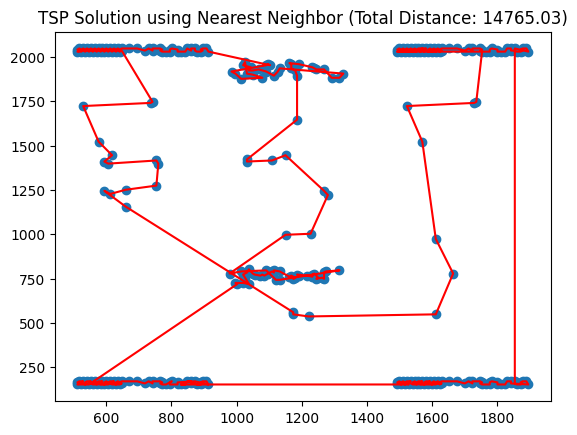

Time taken to render: 0.802405834197998 seconds




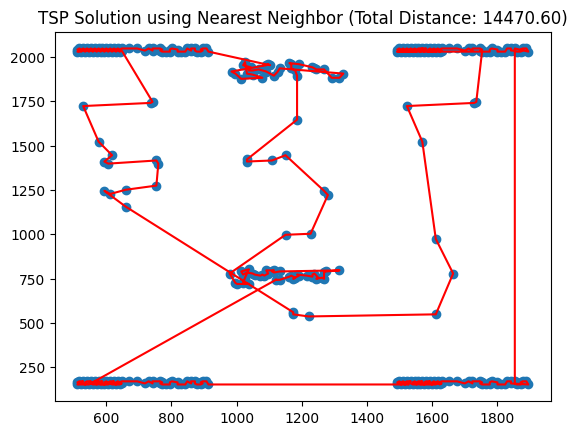

Time taken to render: 0.8312044143676758 seconds




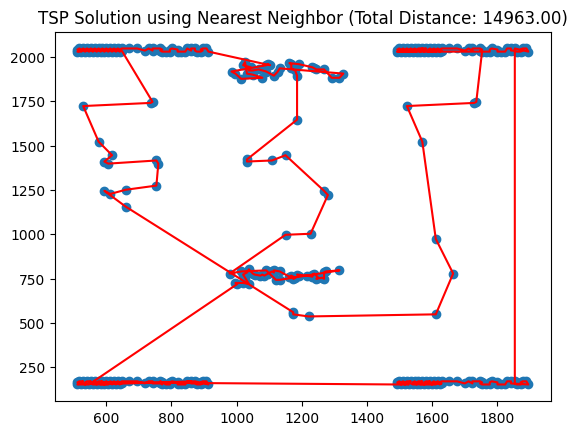

Time taken to render: 0.7293136119842529 seconds




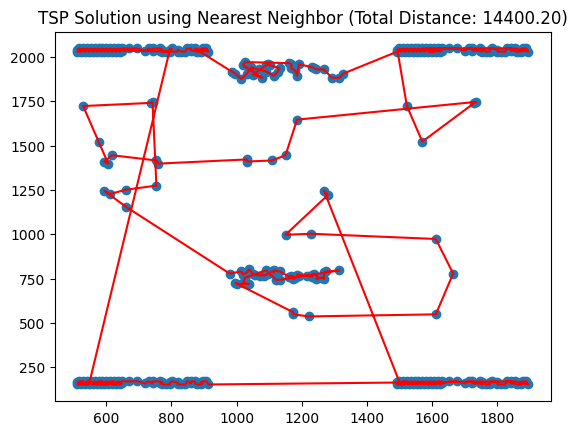

Time taken to render: 0.6378493309020996 seconds




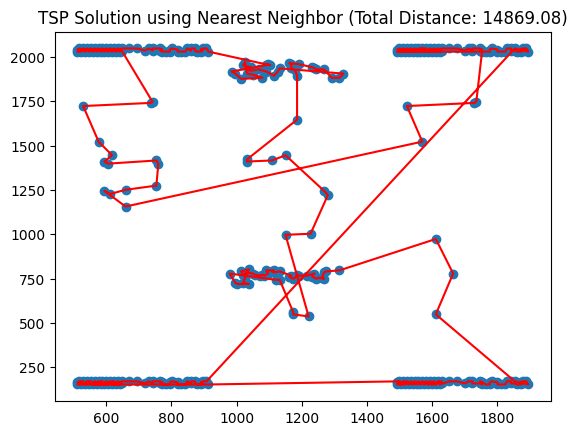

Time taken to render: 0.6325275897979736 seconds




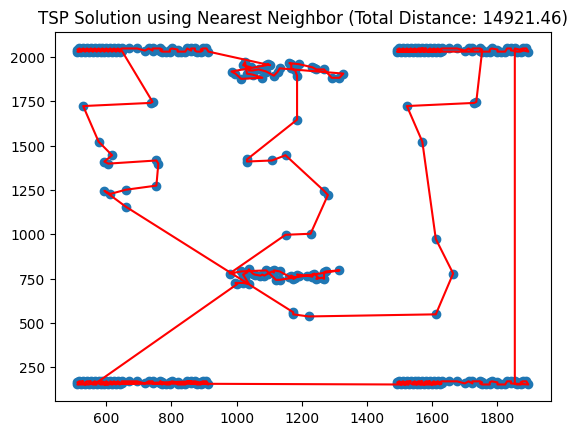

Time taken to render: 0.8264636993408203 seconds




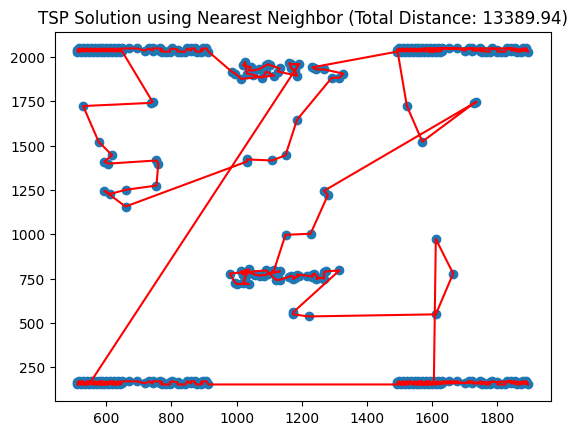

Time taken to render: 0.6783266067504883 seconds




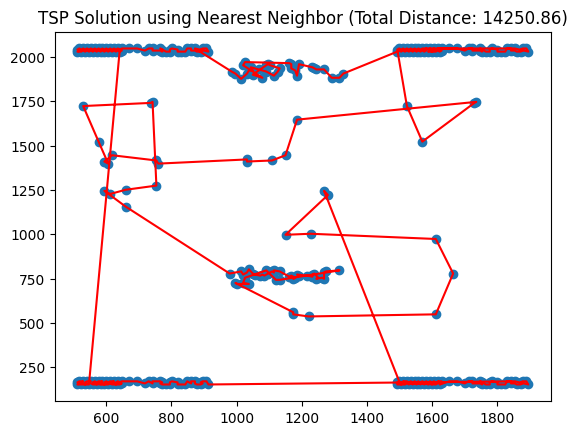

Time taken to render: 0.7481906414031982 seconds




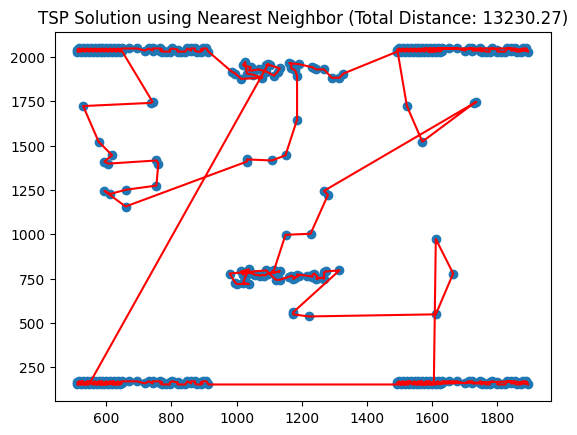

Time taken to render: 0.7041065692901611 seconds


Average Tour Length: 14332.798199476887
Time taken to render: 0.7043695449829102 seconds


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\d+\s+([\d.e+-]+)\s+([\d.e+-]+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(1)), float(match.group(2))))


    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "fl417.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(10):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate average tour length
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")


fl417_NNHwith2OPT

Iteration 46: Improved total distance to 14262.66
Iteration 17316: Improved total distance to 14255.74
Iteration 20620: Improved total distance to 14252.16
Iteration 25603: Improved total distance to 14251.78
Iteration 25944: Improved total distance to 14248.49
Iteration 25945: Improved total distance to 14246.99
Iteration 25950: Improved total distance to 14229.63
Iteration 26985: Improved total distance to 14225.30
Iteration 27326: Improved total distance to 14214.10
Iteration 28011: Improved total distance to 14206.49
Iteration 30053: Improved total distance to 14193.76
Iteration 30714: Improved total distance to 14193.71
Iteration 30722: Improved total distance to 14152.21
Iteration 31377: Improved total distance to 14146.14
Iteration 31707: Improved total distance to 14140.89
Iteration 33350: Improved total distance to 14125.61
Iteration 34319: Improved total distance to 14124.54
Iteration 39426: Improved total distance to 14120.07
Iteration 43551: Improved total distance to 14108

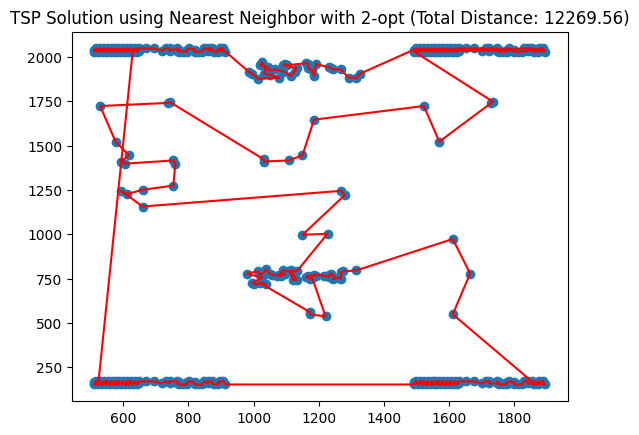

Time taken to render: 1382.7616760730743 seconds


Iteration 13: Improved total distance to 13255.54
Iteration 834: Improved total distance to 13255.49
Iteration 37498: Improved total distance to 13181.67
Iteration 45069: Improved total distance to 13177.20
Iteration 48928: Improved total distance to 13165.65
Iteration 48930: Improved total distance to 13153.59
Iteration 48933: Improved total distance to 13143.04
Iteration 48935: Improved total distance to 13142.71
Iteration 48938: Improved total distance to 13136.18
Iteration 48939: Improved total distance to 13126.01
Iteration 48943: Improved total distance to 13114.65
Iteration 48945: Improved total distance to 13109.31
Iteration 48946: Improved total distance to 13107.06
Iteration 48950: Improved total distance to 13092.49
Iteration 48956: Improved total distance to 13088.34
Iteration 48965: Improved total distance to 13083.46
Iteration 48966: Improved total distance to 13083.44
Iteration 49238: Improved total distance to 13071.62


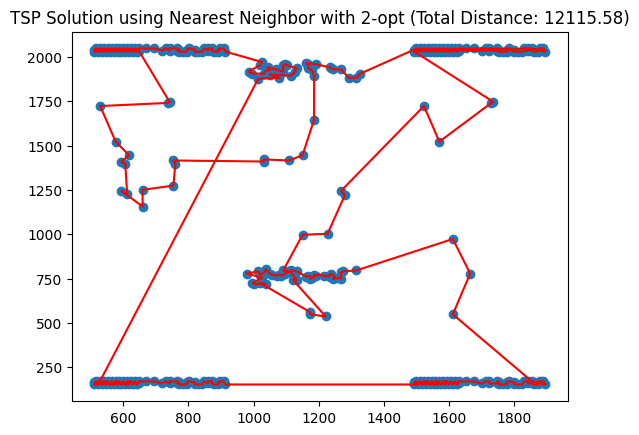

Time taken to render: 919.0811865329742 seconds


Average Tour Length: 12192.569179842263
Average Time taken to render: 1150.9214313030243 seconds


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\d+\s+([\d.e+-]+)\s+([\d.e+-]+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(1)), float(match.group(2))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "fl417.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []
render_times = []

for i in range(2):
    start_time = time.time()  # Start timing for this run
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 2-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")


fl417_NNHwith3OPT

Iteration 524: Improved total distance to 13092.09
Iteration 8484474: Improved total distance to 13027.22
Iteration 10215692: Improved total distance to 13019.64
Iteration 10513069: Improved total distance to 13006.00
Iteration 11231154: Improved total distance to 12797.86
Iteration 11539642: Improved total distance to 12788.48
Iteration 11547391: Improved total distance to 12779.11
Iteration 11701370: Improved total distance to 12777.25
Iteration 11812466: Improved total distance to 12762.66
Iteration 11814400: Improved total distance to 12750.76
Iteration 11816864: Improved total distance to 12748.71
Iteration 11821337: Improved total distance to 12726.55
Iteration 11891040: Improved total distance to 12450.93
Iteration 14722135: Improved total distance to 12445.15
Iteration 17718007: Improved total distance to 12440.08
Iteration 18689243: Improved total distance to 12422.81
Iteration 21598165: Improved total distance to 12418.99
Iteration 21625852: Improved total distance to 12387.3

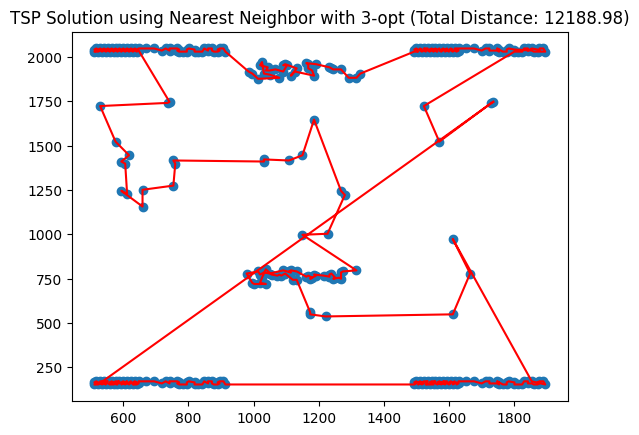

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        if random.random() < 0.1:  # Adjust this probability as needed
                            new_tour = self.three_opt_swap(tour, i, j, k)
                            if self.total_distance(new_tour) < self.total_distance(tour):
                                tour = new_tour
                                improvement = True
                                print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\d+\s+([\d.e+-]+)\s+([\d.e+-]+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(1)), float(match.group(2))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "fl417.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances for three runs
total_distances = []
render_times = []

for i in range(1):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution for each run
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")

Time taken to render: 8h 50m 4s